In [1]:
from math import radians, sin, cos, asin, sqrt
import pandas as pd
import time
import numpy as np


In [2]:
maintenance = pd.read_excel(r".\DATA\predictive_maintenance_dataset.xlsx")

In [3]:
maintenance.head()


,timestamp,machine_id,rpm,load_percentage,ambient_temp,bearing_temp,motor_temp,vibration_x,vibration_y,vibration_z,motor_current,operating_hours,fault_condition,fault_code,maintenance_required
0,2023-01-01 00:00:00,MACHINE_01,1824.8,73.6,28.2,50.1,53.6,0.467,0.563,0.323,11.2,-5.6,Normal,0,0
1,2023-01-01 01:00:00,MACHINE_04,1749.4,78.1,20.5,40.9,59.7,0.485,0.395,0.180,11.3,19.0,Normal,0,0
2,2023-01-01 02:00:00,MACHINE_02,1799.3,64.4,29.1,41.5,55.7,0.298,0.238,0.301,12.6,11.6,Normal,0,0
3,2023-01-01 03:00:00,MACHINE_09,1817.2,57.4,26.6,43.5,52.6,0.581,0.494,0.371,10.9,-10.5,Normal,0,0
4,2023-01-01 04:00:00,MACHINE_07,1840.6,88.6,24.6,49.6,53.8,0.452,0.438,0.417,12.0,-17.9,Normal,0,0


In [4]:
maintenance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             5000 non-null   object 
 1   machine_id            5000 non-null   object 
 2   rpm                   5000 non-null   float64
 3   load_percentage       5000 non-null   float64
 4   ambient_temp          5000 non-null   float64
 5   bearing_temp          5000 non-null   float64
 6   motor_temp            5000 non-null   float64
 7   vibration_x           5000 non-null   float64
 8   vibration_y           5000 non-null   float64
 9   vibration_z           5000 non-null   float64
 10  motor_current         5000 non-null   float64
 11  operating_hours       5000 non-null   float64
 12  fault_condition       5000 non-null   object 
 13  fault_code            5000 non-null   int64  
 14  maintenance_required  5000 non-null   int64  
dtypes: float64(10), int64

In [5]:
maintenance.isnull().sum()

timestamp               0
machine_id              0
rpm                     0
load_percentage         0
ambient_temp            0
bearing_temp            0
motor_temp              0
vibration_x             0
vibration_y             0
vibration_z             0
motor_current           0
operating_hours         0
fault_condition         0
fault_code              0
maintenance_required    0
dtype: int64

In [6]:
maintenance.describe()

,rpm,load_percentage,ambient_temp,bearing_temp,motor_temp,vibration_x,vibration_y,vibration_z,motor_current,operating_hours,fault_code,maintenance_required
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1799.976580,74.868440,24.972380,47.860740,56.451200,0.611389,0.488631,0.37153,12.211180,1249.818520,0.604600,0.198400
std,49.602832,10.049538,5.072996,8.971607,6.031995,0.308488,0.255293,0.22603,1.238728,721.763504,1.370633,0.398835
min,1623.400000,37.700000,2.700000,31.900000,41.200000,0.100000,0.100000,0.10000,7.800000,-17.900000,0.000000,0.000000
25%,1766.400000,68.100000,21.600000,43.200000,52.900000,0.444000,0.347000,0.25600,11.400000,625.025000,0.000000,0.000000
50%,1800.300000,74.900000,25.000000,45.700000,55.800000,0.526000,0.427000,0.32000,12.100000,1250.800000,0.000000,0.000000
75%,1833.425000,81.700000,28.400000,48.600000,59.000000,0.632000,0.527000,0.40200,12.900000,1873.425000,0.000000,0.000000
max,1958.600000,113.500000,41.100000,107.400000,95.000000,2.525000,2.386000,2.29600,19.700000,2517.500000,5.000000,1.000000


In [7]:
df = maintenance[['machine_id','rpm', 'load_percentage', 'bearing_temp', 'motor_current', 'fault_code']].copy()
df['vibration_magnitude'] = np.sqrt(maintenance['vibration_x']**2 + maintenance['vibration_y']**2 + maintenance['vibration_z']**2)
df['temp_diff'] = maintenance['motor_temp'] - maintenance['ambient_temp']


In [8]:

df.head()

,machine_id,rpm,load_percentage,bearing_temp,motor_current,fault_code,vibration_magnitude,temp_diff
0,MACHINE_01,1824.8,73.6,50.1,11.2,0,0.799617,25.4
1,MACHINE_04,1749.4,78.1,40.9,11.3,0,0.650884,39.2
2,MACHINE_02,1799.3,64.4,41.5,12.6,0,0.485849,26.6
3,MACHINE_09,1817.2,57.4,43.5,10.9,0,0.848079,26.0
4,MACHINE_07,1840.6,88.6,49.6,12.0,0,0.755008,29.2


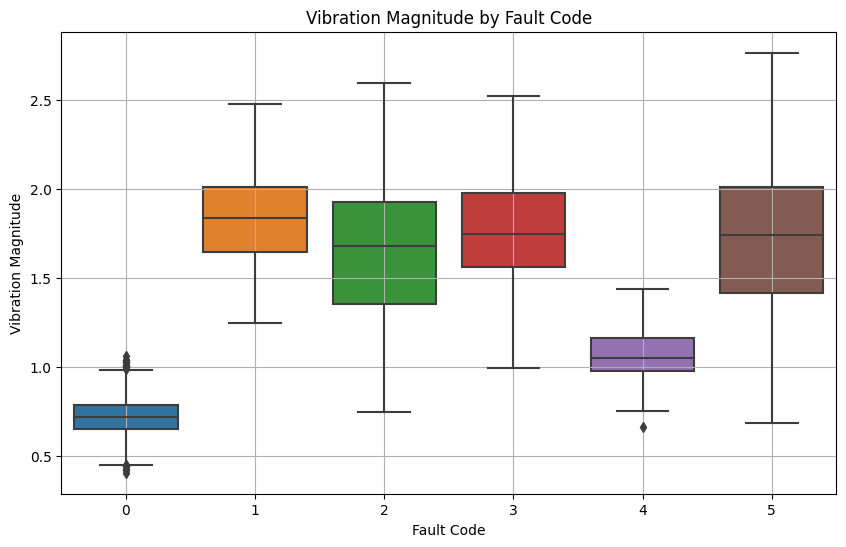

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='fault_code', y='vibration_magnitude', data=df)

plt.title("Vibration Magnitude by Fault Code")
plt.xlabel("Fault Code")
plt.ylabel("Vibration Magnitude")
plt.grid(True)
plt.show()

.\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


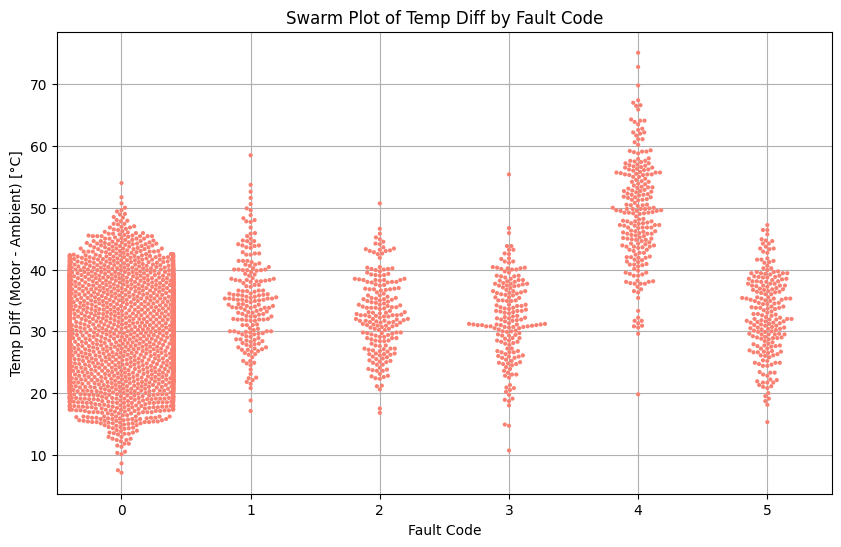

In [10]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='fault_code', y='temp_diff', data=df, size=3, color='salmon')
plt.title("Swarm Plot of Temp Diff by Fault Code")
plt.xlabel("Fault Code")
plt.ylabel("Temp Diff (Motor - Ambient) [°C]")
plt.grid(True)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X = df[['rpm', 'load_percentage', 'bearing_temp', 'motor_current', 'vibration_magnitude', 'temp_diff']]  
y = df[['fault_code']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [16]:
print(X)

         rpm  load_percentage  bearing_temp  motor_current  \
0     1824.8             73.6          50.1           11.2   
1     1749.4             78.1          40.9           11.3   
2     1799.3             64.4          41.5           12.6   
3     1817.2             57.4          43.5           10.9   
4     1840.6             88.6          49.6           12.0   
...      ...              ...           ...            ...   
4995  1857.4             75.4          60.2           12.9   
4996  1911.1             66.1          79.9           14.6   
4997  1793.5             72.9          52.6           11.1   
4998  1786.6             75.9          38.1           10.9   
4999  1711.1             69.8          47.0           10.6   

      vibration_magnitude  temp_diff  
0                0.799617       25.4  
1                0.650884       39.2  
2                0.485849       26.6  
3                0.848079       26.0  
4                0.755008       29.2  
...                  

In [17]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, learning_rate=0.05, random_state=21)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()
print(roc_auc_score(
    y_test,
    model.predict_proba(X_test),
    multi_class='ovr',    # or 'ovo'
    average='macro'
))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       805
           1       0.69      0.73      0.71        37
           2       0.40      0.29      0.33        42
           3       0.37      0.59      0.46        32
           4       0.97      0.97      0.97        40
           5       0.45      0.30      0.36        44

    accuracy                           0.92      1000
   macro avg       0.65      0.65      0.64      1000
weighted avg       0.91      0.92      0.91      1000

[[805   0   0   0   0   0]
 [  0  27   1   1   1   7]
 [  3   4  12  17   0   6]
 [  0   1   9  19   0   3]
 [  0   1   0   0  39   0]
 [  3   6   8  14   0  13]]

0.9749963155505424


In [22]:
import joblib
joblib.dump(model, 'Predict_model.pkl')

['Predict_model.pkl']